## NonLinear Beam Equation
\begin{align}
\frac{\partial^{4}w}{\partial x^4} - \frac{\partial^{2}w}{\partial x^2}\int_{0}^{L} \left( \frac{\partial w}{\partial x} \right)^2 dx = f,
\end{align}

\begin{align}
w(0) = w^{'}(0)=w(L) = w^{'}(L)= 0.
\end{align}

Here, $w$ is vertical deflection and $f$ is uniform distributive load.


#### Weak Form

By introducing the linearized moments $\sigma = w^{"}$, and $\mu = \int_{0}^{L} \left( \frac{\partial w}{\partial x} \right)^2 dx$, find $(w,\sigma,\mu) \in H_{0}^{1}((0,L)) \times H_{0}^{1}((0,L)) \times  \mathbb{R} $, for all $(v,\tau,\lambda) \in H_{0}^{1}((0,L)) \times H_{0}^{1}((0,L))\times  \mathbb{R}$

\begin{align}
\int_{0}^{L}\sigma \tau dx + \int_{0}^{L}w^{'} \tau^{'}dx + \int_{0}^{L}\sigma^{'} v^{'}dx + \frac{1}{2}\mu\int_{0}^{L}w^{'} v^{'}dx + \int_{0}^{L}\mu \lambda dx - \int_{0}^{L}w^{'2}\lambda dx= - \int_{0}^{L} f dx,
\end{align}

In [1]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
mesh = Make1DMesh(500, mapping=None, periodic=False)
# uniform distributed load
q = np.arange(start=0, stop=10, step=1)
# q = 0.4
# Draw(mesh)

In [3]:
w = H1(mesh, order=1, dirichlet="left|right")
sigma = H1(mesh, order=1, dirichlet=" ")
mu = NumberSpace(mesh)
fesm = w*sigma*mu
print ("ndof =", fesm.ndof)

ndof = 1003


In [4]:
w, sigma, mu = fesm.TrialFunction()
v , tau, lamda = fesm.TestFunction()

Newton iteration  0
err =  0.0
Newton iteration  0
err =  0.03726779962561778
Newton iteration  1
err =  3.3068265438365965e-05
Newton iteration  2
err =  7.516631396061487e-08
Newton iteration  3
err =  3.106879135747325e-13
Newton iteration  0
err =  0.07453559925123555
Newton iteration  1
err =  0.0001322724056616326
Newton iteration  2
err =  6.01321337673279e-07
Newton iteration  3
err =  9.941978621919529e-12
Newton iteration  0
err =  0.11180339887684157
Newton iteration  1
err =  0.00029761045244312454
Newton iteration  2
err =  2.0294079134162013e-06
Newton iteration  3
err =  7.549247547500822e-11
Newton iteration  4
err =  3.482450943279742e-15
Newton iteration  0
err =  0.1490711985024711
Newton iteration  1
err =  0.0005290791255677443
Newton iteration  2
err =  4.810277157065757e-06
Newton iteration  3
err =  3.181002106859089e-10
Newton iteration  4
err =  2.6328389287974995e-14
Newton iteration  0
err =  0.18633899812806634
Newton iteration  1
err =  0.00082667383307603

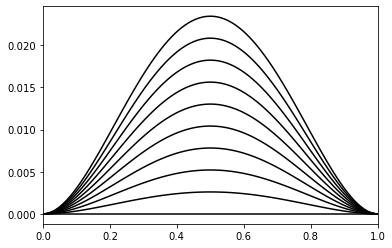

In [5]:
for i in range(len(q)):
    a = BilinearForm(fesm)
    a += (grad(sigma)*grad(v)  + 1/2*grad(w)*grad(v)*mu + sigma*tau \
       + grad(w)*grad(tau) + mu*lamda - grad(w)**2*lamda + q[i]*v)*dx
    
    gfsol = GridFunction(fesm)
    
    solvers.Newton(a,gfsol,inverse="sparsecholesky")
    gfw, gfsigma, gfmu = gfsol.components
    x=np.linspace(0,1,100)
#     gfw(mesh(x))

    plt.plot(x,gfw(mesh(x)),color='black',label='Transverse Load = 0.4',linestyle="-")
#     plt.ylim([-0.0025, 0.0025])
    plt.xlim([0, 1.0])
    index = int((len(gfw.vec)+1)/2)
#     print(gfw.vec[index])
#     y_axis.append(gfw.vec[index])


In [ ]:
gfw, gfsigma, gfmu = gfsol.components

In [ ]:
print(gfw.vec)

In [ ]:
x=np.linspace(0,1,100)

plt.plot(x,gfw(mesh(x)),color='black',label='Transverse Load = 0.4',linestyle="-")
plt.ylim([-0.0025, 0.0025])
plt.xlim([0, 1.0])
plt.title("Numerical Solution")
plt.xlabel("Length(L)")
plt.ylabel("Deflection(w)")